### About the Dataset:
#### 1. id: unique id for na news article
#### 2. title: the title of a news article
#### 3. author: author of the news article
#### 4. text: the text of the article; could be incomplete
#### 5. label: a label that marks whether the news article is real or fake

In [1]:
import numpy as np
import pandas as pd
import re ## regular expression, for searching the text in a document
from nltk.corpus import stopwords ## stopwords are which not necessary in dataset(a,is,the)
from nltk.stem.porter import PorterStemmer ## give root words with cutting suffix n prefix words
from sklearn.feature_extraction.text import TfidfVectorizer ## text into feature
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
## print(stopwords.words('english'))

### Data Preprocessing

In [4]:
# loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv("train.csv")

In [5]:
# print the first 5 rows of the dataframe
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
news_dataset.shape

(20800, 5)

In [7]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
## here we are droping the null values beoz our dataset is large, so we can drop it
## replacing the null values with empty string

In [9]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [10]:
## For the prediction we Merging the author name and news title for the better accuracy, not choosing text col. beoz it is large text data and take time for processing.

In [11]:
#merging the author name and news title
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']

In [12]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [13]:
# separating the data & label
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [14]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [15]:
port_stem = PorterStemmer()

In [16]:
# stemming is the process of reducing a word to its root words
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content) # Removing non-alphabet characters,'^' use for exclusion of words from a to z
    stemmed_content = stemmed_content.lower() # Lowercasing, beoz uppercase letters have significant in itself.
    stemmed_content = stemmed_content.split() # Splitting into individual words
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] # Stemming and removing stopwords
    stemmed_content = ' '.join(stemmed_content) # Joining the stemmed words back into a string
    return stemmed_content

In [17]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [18]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [19]:
#separating the data and label
## here we need to convert it into numpy array beoz most libraries and feature extraction techique works well with array instaed of dataframe or series
X = news_dataset['content'].values # convert a DataFrame column or an entire DataFrame into a NumPy array.
Y = news_dataset['label'].values

In [20]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [21]:
print(Y)

[1 0 1 ... 0 1 1]


In [22]:
Y.shape

(20800,)

In [23]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [24]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 210687 stored elements and shape (20800, 17128)>
  Coords	Values
  (0, 267)	0.2701012497770876
  (0, 2483)	0.36765196867972083
  (0, 2959)	0.24684501285337127
  (0, 3600)	0.3598939188262558
  (0, 3792)	0.27053324808454915
  (0, 4973)	0.23331696690935097
  (0, 7005)	0.2187416908935914
  (0, 7692)	0.24785219520671598
  (0, 8630)	0.2921251408704368
  (0, 8909)	0.36359638063260746
  (0, 13473)	0.2565896679337956
  (0, 15686)	0.2848506356272864
  (1, 1497)	0.2939891562094648
  (1, 1894)	0.15521974226349364
  (1, 2223)	0.3827320386859759
  (1, 2813)	0.19094574062359204
  (1, 3568)	0.26373768806048464
  (1, 5503)	0.7143299355715573
  (1, 6816)	0.1904660198296849
  (1, 16799)	0.30071745655510157
  (2, 2943)	0.3179886800654691
  (2, 3103)	0.46097489583229645
  (2, 5389)	0.3866530551182615
  (2, 5968)	0.3474613386728292
  (2, 9620)	0.49351492943649944
  :	:
  (20797, 3643)	0.2115550061362374
  (20797, 7042)	0.21799048897828685
  (2079

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2) #test_size= 20% for testing 80% for training.
# stratify Y=Ensures that the train-test split maintains the same proportion of classes (Fake/Real) as in the original dataset, stratification is only needed for the target variable (Y)
# random_state=2 => Ensures the same split every time

## SVM Algorithm

In [26]:
from sklearn.svm import LinearSVC

In [27]:
model_svm = LinearSVC(max_iter=1000)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2) #test_size= 20% for testing 80% for training.

In [28]:
model_svm.fit(X_train, Y_train)

LinearSVC()

In [29]:
# Predict on training and test data
X_train_prediction = model_svm.predict(X_train)
X_test_prediction = model_svm.predict(X_test)

# Accuracy on training and test sets
training_accuracy = accuracy_score(Y_train, X_train_prediction)
test_accuracy = accuracy_score(Y_test, X_test_prediction)

print("Training Accuracy:", training_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9993990384615384
Test Accuracy: 0.9923076923076923


#### Making a predictive system

In [61]:
X_new = X_test[7]

prediction = model_svm.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [62]:
print(Y_test[7])

0


In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

Confusion Matrix:
 [[2064   13]
 [ 174 1909]]


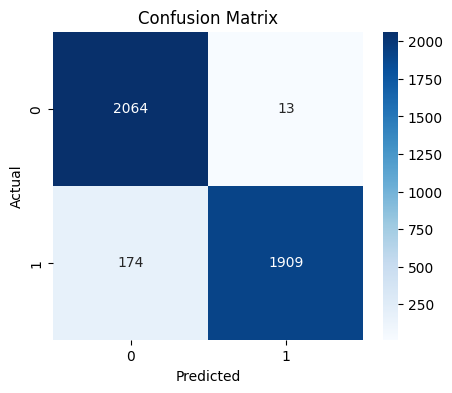

In [66]:
cm = confusion_matrix(Y_test, X_test_prediction)
print("Confusion Matrix:\n", cm)

# Optional: Pretty heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='2d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [34]:
##  F1-Score, Precision, Recall
report = classification_report(Y_test, X_test_prediction, target_names=['Real', 'Fake'])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

        Real       0.99      0.99      0.99      2077
        Fake       0.99      0.99      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



In [35]:
## linearSVC or SVC doesn't support prediction of AUC-ROC curve, beoz of lacks probabibility support.

## Logistic Algorithm

In [36]:
model_logistic = LogisticRegression(max_iter=1000)

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2) #test_size= 20% for testing 80% for training.
# stratify Y=Ensures that the train-test split maintains the same proportion of classes (Fake/Real) as in the original dataset, stratification is only needed for the target variable (Y)
# random_state=2 => Ensures the same split every time

In [38]:
model_logistic.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [39]:
# Predict on training and test data
X_train_prediction = model_logistic.predict(X_train)
X_test_prediction = model_logistic.predict(X_test)

# Accuracy on training and test sets
training_accuracy = accuracy_score(Y_train, X_train_prediction)
test_accuracy = accuracy_score(Y_test, X_test_prediction)

print("Training Accuracy:", training_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9863581730769231
Test Accuracy: 0.9790865384615385


In [40]:
X_new = X_test[3]

prediction = model_logistic.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [41]:
print(Y_test[3])

0


Confusion Matrix:
 [[2004   73]
 [  14 2069]]


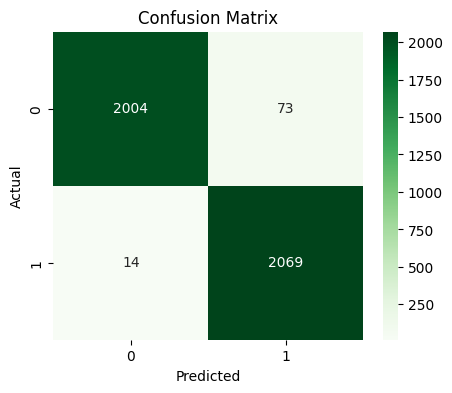

In [42]:
cm = confusion_matrix(Y_test, X_test_prediction)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [43]:
report = classification_report(Y_test, X_test_prediction, target_names=['Real', 'Fake'])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

        Real       0.99      0.96      0.98      2077
        Fake       0.97      0.99      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



ROC-AUC Score: 0.9977912306123048


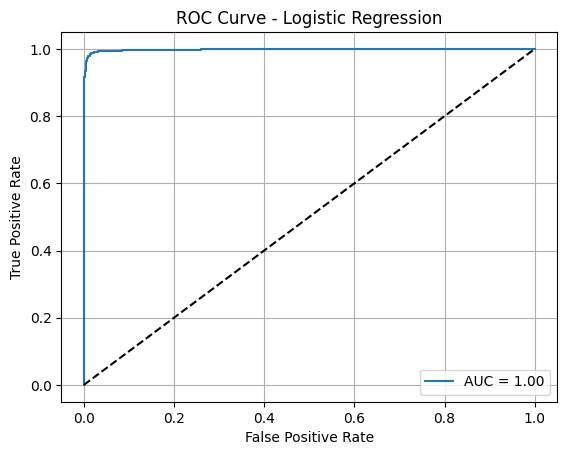

In [44]:
# Get prediction probabilities for the positive class (Fake = 1)
y_probs = model_logistic.predict_proba(X_test)[:, 1]

# ROC-AUC score
auc = roc_auc_score(Y_test, y_probs)
print("ROC-AUC Score:", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

##  Naive bayes using MultinomialNB

In [45]:
from sklearn.naive_bayes import MultinomialNB
model_nb = MultinomialNB()
model_nb.fit(X_train,Y_train)

MultinomialNB()

In [46]:
# Predict on training and test data
X_train_prediction = model_nb.predict(X_train)
X_test_prediction = model_nb.predict(X_test)

# Accuracy on training and test sets
training_accuracy = accuracy_score(Y_train, X_train_prediction)
test_accuracy = accuracy_score(Y_test, X_test_prediction)

print("Training Accuracy:", training_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9782451923076924
Test Accuracy: 0.9550480769230769


In [47]:
X_new = X_test[3]

prediction = model_nb.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


Confusion Matrix:
 [[2064   13]
 [ 174 1909]]


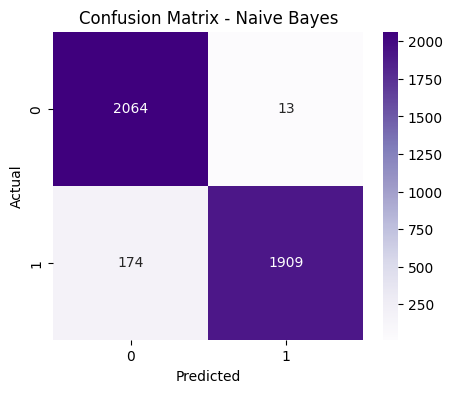

In [48]:
# Confusion Matrix
cm = confusion_matrix(Y_test, X_test_prediction)
print("Confusion Matrix:\n", cm)

# Plot
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


In [49]:
report = classification_report(Y_test, X_test_prediction, target_names=['Real', 'Fake'])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

        Real       0.92      0.99      0.96      2077
        Fake       0.99      0.92      0.95      2083

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.95      4160
weighted avg       0.96      0.96      0.95      4160



ROC-AUC Score: 0.996130261920386


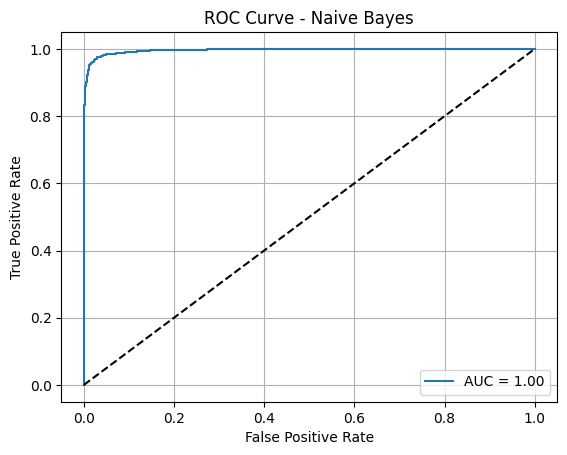

In [50]:
from sklearn.metrics import roc_auc_score, roc_curve

# Predict probabilities for class 1 (Fake)
y_scores = model_nb.predict_proba(X_test)[:, 1]

# ROC-AUC Score
auc_score = roc_auc_score(Y_test, y_scores)
print("ROC-AUC Score:", auc_score)

# ROC Curve
fpr, tpr, _ = roc_curve(Y_test, y_scores)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.grid(True)
plt.show()


## Decision Tree Algorithm

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
model_dt = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5)
model_dt.fit(X_train, Y_train)

X_train_pred = model_dt.predict(X_train)
X_test_pred = model_dt.predict(X_test)

print("Training Accuracy:", accuracy_score(Y_train, X_train_pred))
print("Test Accuracy:", accuracy_score(Y_test, X_test_pred))

Training Accuracy: 0.9563100961538461
Test Accuracy: 0.9516826923076923


In [53]:
X_new = X_test[3]

prediction = model_dt.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


Confusion Matrix:
 [[2064   13]
 [ 174 1909]]


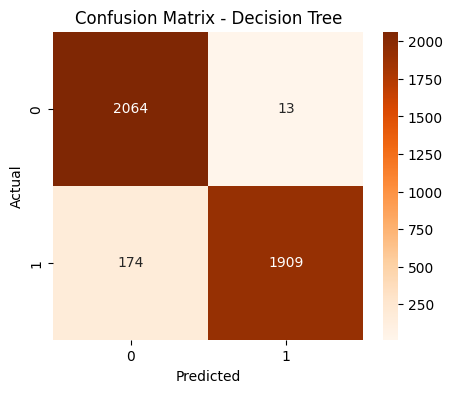

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(Y_test, X_test_prediction)
print("Confusion Matrix:\n", cm)

# Plot
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


In [55]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, X_test_prediction, target_names=['Real', 'Fake'])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

        Real       0.92      0.99      0.96      2077
        Fake       0.99      0.92      0.95      2083

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.95      4160
weighted avg       0.96      0.96      0.95      4160



ROC-AUC Score: 0.9515187138656679


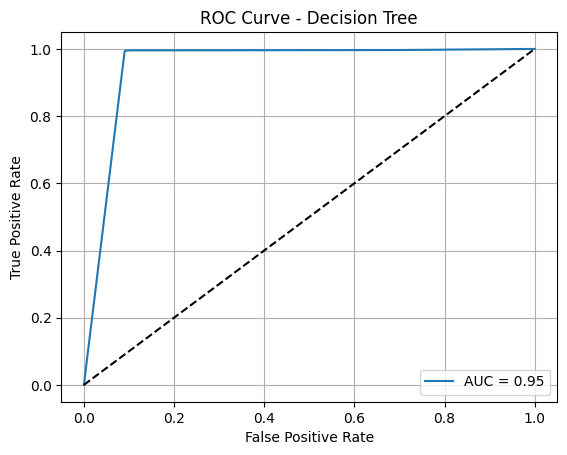

In [56]:
from sklearn.metrics import roc_auc_score, roc_curve

# Predict probability for class 1 (Fake)
y_scores = model_dt.predict_proba(X_test)[:, 1]

# ROC-AUC score
auc_score = roc_auc_score(Y_test, y_scores)
print("ROC-AUC Score:", auc_score)

# ROC Curve
fpr, tpr, _ = roc_curve(Y_test, y_scores)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

## Model Accuracy Comparison

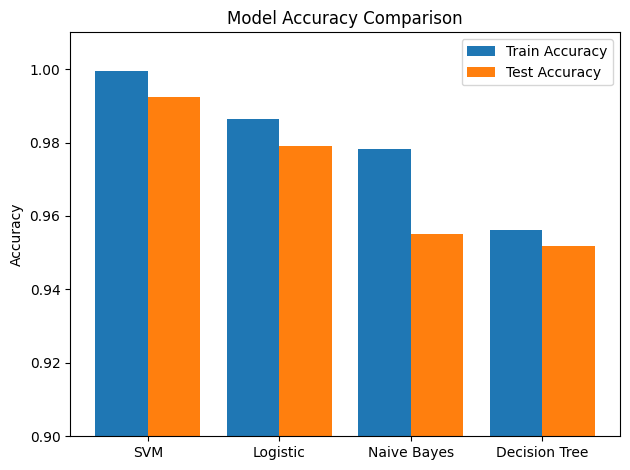

In [57]:
import matplotlib.pyplot as plt

models = ['SVM', 'Logistic', 'Naive Bayes', 'Decision Tree']
train_acc = [0.9994, 0.9864, 0.9782, 0.9563]
test_acc = [0.9923, 0.9791, 0.9550, 0.9517]

x = range(len(models))
plt.bar(x, train_acc, width=0.4, label='Train Accuracy', align='center')
plt.bar([p + 0.4 for p in x], test_acc, width=0.4, label='Test Accuracy', align='center')
plt.xticks([p + 0.2 for p in x], models)
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.01)
plt.title('Model Accuracy Comparison')
plt.legend()
plt.tight_layout()
plt.savefig("Accuracy_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

## Comparison of all four models roc-curve

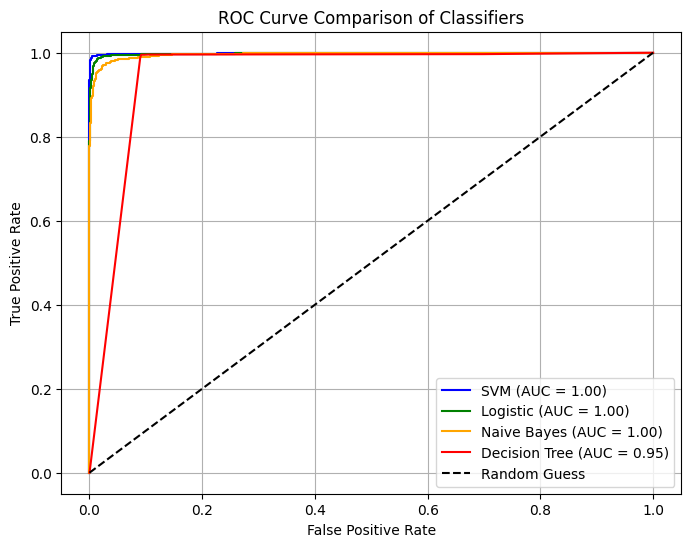

In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming all models are already trained:
# model_svm, model_logistic, model_nb, model_dt

# Get predicted probabilities or decision scores
svm_scores = model_svm.decision_function(X_test)
logistic_probs = model_logistic.predict_proba(X_test)[:, 1]
nb_probs = model_nb.predict_proba(X_test)[:, 1]
dt_probs = model_dt.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_svm, tpr_svm, _ = roc_curve(Y_test, svm_scores)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_logistic, tpr_logistic, _ = roc_curve(Y_test, logistic_probs)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_nb, tpr_nb, _ = roc_curve(Y_test, nb_probs)
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_dt, tpr_dt, _ = roc_curve(Y_test, dt_probs)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot all ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})', color='blue')
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic (AUC = {roc_auc_logistic:.2f})', color='green')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})', color='orange')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})', color='red')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Classifiers')
plt.legend(loc='lower right')
plt.grid()
plt.savefig("roc_curve_comparison.png", dpi=300, bbox_inches='tight')
plt.show()


## Comparison of all four models Confusion matrices

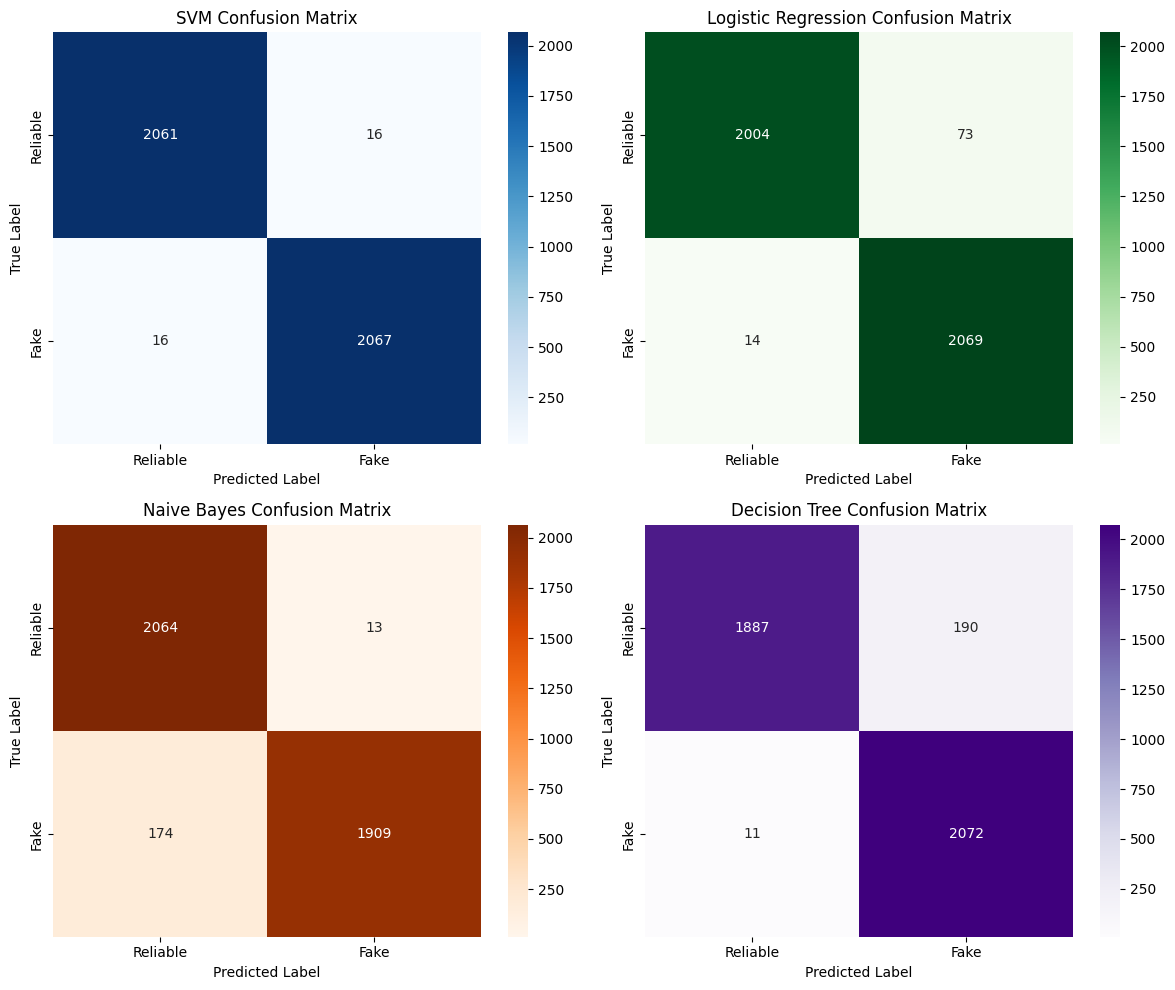

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred_svm = model_svm.predict(X_test)
y_pred_logistic = model_logistic.predict(X_test)
y_pred_nb = model_nb.predict(X_test)
y_pred_dt = model_dt.predict(X_test)

# Compute confusion matrices
cm_svm = confusion_matrix(Y_test, y_pred_svm)
cm_logistic = confusion_matrix(Y_test, y_pred_logistic)
cm_nb = confusion_matrix(Y_test, y_pred_nb)
cm_dt = confusion_matrix(Y_test, y_pred_dt)

# Plotting with different colormaps
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
titles = ['SVM', 'Logistic Regression', 'Naive Bayes', 'Decision Tree']
cms = [cm_svm, cm_logistic, cm_nb, cm_dt]
cmaps = ['Blues', 'Greens', 'Oranges', 'Purples']  # Different colormaps

for ax, cm, title, cmap in zip(axes.ravel(), cms, titles, cmaps):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=['Reliable', 'Fake'], yticklabels=['Reliable', 'Fake'], ax=ax)
    ax.set_title(f'{title} Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()
   

## Combined classification report of all four models

In [60]:
from sklearn.metrics import classification_report

# Example for SVM
print("SVM Report:\n", classification_report(Y_test, model_svm.predict(X_test)))

# Repeat for other models
print("Logistic:\n", classification_report(Y_test, model_logistic.predict(X_test)))
print("Naive Bayes:\n", classification_report(Y_test, model_nb.predict(X_test)))
print("Decision Tree:\n", classification_report(Y_test, model_dt.predict(X_test)))

SVM Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.99      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160

Logistic:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      2077
           1       0.97      0.99      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160

Naive Bayes:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      2077
           1       0.99      0.92      0.95      2083

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.95      4160
weighted avg       0.96      0.96   